In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

In [11]:
# Data from https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
df = pd.read_csv("311.csv")

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,39,40,41,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(df)

199999

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 53 columns):
Unique Key                        199999 non-null int64
Created Date                      199999 non-null object
Closed Date                       195983 non-null object
Agency                            199999 non-null object
Agency Name                       199999 non-null object
Complaint Type                    199999 non-null object
Descriptor                        199132 non-null object
Location Type                     78180 non-null object
Incident Zip                      171566 non-null float64
Incident Address                  125786 non-null object
Street Name                       125785 non-null object
Cross Street 1                    132623 non-null object
Cross Street 2                    130444 non-null object
Intersection Street 1             71467 non-null object
Intersection Street 2             71446 non-null object
Address Type                      195

In [12]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df['happened_at'] = df['Created Date'].apply(parse_date)

In [15]:
# How many ended up as not being parsed?
pd.isnull(df['happened_at']).value_counts()

False    199999
Name: happened_at, dtype: int64

In [ ]:
# Move the index over, delete 'happened_at'
df.index = df['happened_at']
del df['happened_at']

In [21]:
# What's our range looking like?
print(df.index.min())
print(df.index.max())

2010-01-04 00:00:00
2016-05-20 01:13:15


In [22]:
# Let's group by year and see how many we have
df.resample("A").count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
happened_at,,,,,,,,,,,,,,,,,,,,,
2010-12-31,89509,89509,88895,89509,89509,89509,89441,26313,75468,54647,...,9,9,9,9,6,0,31,74914,74914,74914
2011-12-31,78604,78604,77998,78604,78604,78604,78581,25783,66446,45087,...,17,17,17,17,6,0,13,66529,66529,66529
2012-12-31,17,17,16,17,17,17,17,12,15,13,...,0,0,0,0,0,0,0,15,15,15
2013-12-31,17,17,9,17,17,17,17,10,13,13,...,1,1,1,1,0,0,0,12,12,12
2014-12-31,189,189,139,189,189,189,189,103,173,180,...,0,0,0,0,0,0,0,173,173,173
2015-12-31,2069,2069,1919,2069,2069,2069,2068,1031,1820,1623,...,0,0,0,0,0,0,0,1811,1811,1811
2016-12-31,29594,29594,27007,29594,29594,29594,28819,24928,27631,24223,...,128,128,124,133,16,9,21,27086,27086,27086


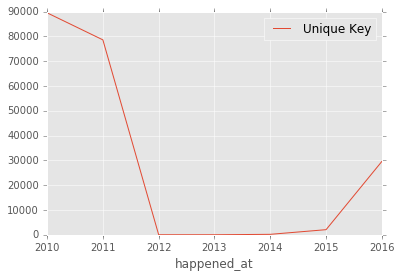

In [24]:
# Since we don't have the entire data set we're missing a lot.
df.resample("A").count().plot(y='Unique Key')

In [26]:
# Let's just grab 2010 then
df_2010 = df["2010"]
df_2010.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
happened_at,,,,,,,,,,,,,,,,,,,,,
2010-11-18 10:53:00,19157621,11/18/2010 10:53:00 AM,11/18/2010 10:53:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11422.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.654108,-73.746911,"(40.654107999915, -73.74691077345408)"
2010-11-01 17:55:00,19025135,11/01/2010 05:55:00 PM,11/01/2010 08:00:00 PM,DEP,Department of Environmental Protection,Asbestos,Asbestos Complaint (B1),NaN,10036.0,235 W 46 ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.759129,-73.986341,"(40.759128565735466, -73.98634107118339)"


In [31]:
df_2010.resample("B").count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
happened_at,,,,,,,,,,,,,,,,,,,,,
2010-01-04,4,4,4,4,4,4,4,0,4,3,...,0,0,0,0,0,0,0,4,4,4
2010-01-05,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,1,1
2010-01-06,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,1
2010-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-08,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,1,1
2010-01-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-12,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,1,1
2010-01-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


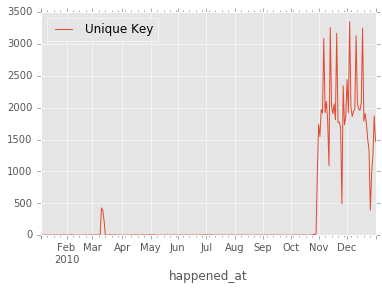

In [33]:
# Well this is the downside of incomplete data!
df_2010.resample("B").count().plot(y='Unique Key')

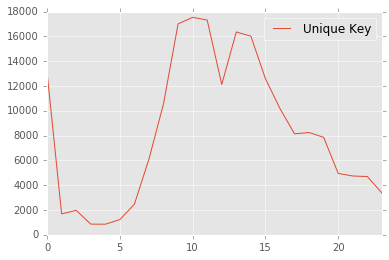

In [35]:
df.groupby(df.index.hour).count().plot(y='Unique Key')

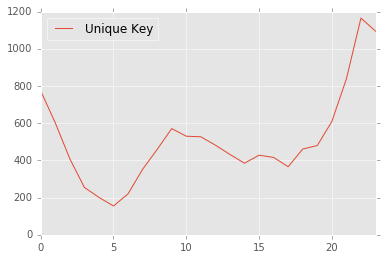

In [36]:
noise_df = df[df['Complaint Type'].str.contains("Noise")]
noise_df.groupby(noise_df.index.hour).count().plot(y='Unique Key')

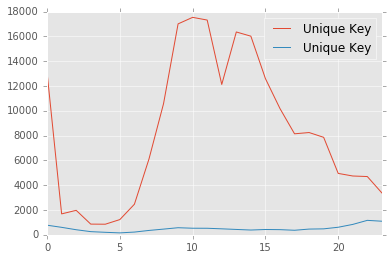

In [37]:
# Combine the two
noise_df = df[df['Complaint Type'].str.contains("Noise")]
ax = df.groupby(df.index.hour).count().plot(y='Unique Key')
noise_df.groupby(noise_df.index.hour).count().plot(y='Unique Key', ax=ax)

In [39]:
df['Complaint Type'].value_counts()

Street Light Condition                   30886
Traffic Signal Condition                 18492
Street Condition                         18024
Snow                                     13831
Water System                             13623
Sewer                                    10798
Dirty Conditions                          8298
Noise                                     6858
HEATING                                   6172
General Construction/Plumbing             5940
Sanitation Condition                      5023
Building/Use                              5015
Missed Collection (All Materials)         4057
Graffiti                                  3574
HEAT/HOT WATER                            3264
Noise - Residential                       2753
Derelict Vehicles                         2742
Blocked Driveway                          2602
Illegal Parking                           2596
PLUMBING                                  1590
Air Quality                               1526
Special Enfor